In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook 

In [2]:
dt = np.dtype([("beta", float), ("SzSz", float), ("err", float), ("Z", float)])
pbc = np.loadtxt("U7L10pbc.dat", dtype=dt)
obc = np.loadtxt("U7L10obc.dat", dtype=dt)

In [3]:
pbc

array([( 1.  , -0.019872,   2.67480000e-05,  303. ),
       ( 1.11, -0.022565,   3.20480000e-05,  214. ),
       ( 1.25, -0.02581 ,   3.55640000e-05,  181. ),
       ( 1.5 , -0.031483,   2.88430000e-05,  180. ),
       ( 1.75, -0.036657,   3.76100000e-05,  118. ),
       ( 2.  , -0.041528,   3.67120000e-05,  125. ),
       ( 2.25, -0.046108,   4.07770000e-05,   85. ),
       ( 2.5 , -0.050297,   3.57210000e-05,   93. ),
       ( 3.  , -0.057556,   2.53120000e-05,   78. ),
       ( 3.3 , -0.061405,   3.54640000e-05,   52. ),
       ( 3.5 , -0.06394 ,   3.57910000e-05,   60. ),
       ( 4.  , -0.069254,   2.88830000e-05,   64. ),
       ( 4.3 , -0.072122,   3.96130000e-05,   36. ),
       ( 4.5 , -0.073852,   3.06690000e-05,   54. ),
       ( 5.  , -0.077449,   2.87490000e-05,   47. ),
       ( 5.2 , -0.078615,   4.31940000e-05,   17. ),
       ( 6.  , -0.08194 ,   6.45810000e-05,   13. ),
       ( 7.  , -0.083698,   7.22080000e-05,    6.3),
       ( 7.5 , -0.084225,   7.37730000e-05,   

In [4]:
obc

array([( 1.  , -0.020967,   2.92040000e-05,  290. ),
       ( 1.11, -0.023866,   7.77230000e-05,  234. ),
       ( 1.25, -0.027418,   3.28820000e-05,  170. ),
       ( 1.5 , -0.033384,   3.27450000e-04,    2. ),
       ( 1.75, -0.039489,   4.50000000e-05,  105. ),
       ( 2.  , -0.044717,   4.83460000e-05,   92. ),
       ( 2.25, -0.049624,   5.00000000e-05,   69. ),
       ( 2.5 , -0.054362,   5.00000000e-05,   53. ),
       ( 3.  , -0.062286,   6.10870000e-05,   28. ),
       ( 4.  , -0.074144,   5.08930000e-05,   30. ),
       ( 5.  , -0.081868,   5.09380000e-05,   21. ),
       ( 6.  , -0.08663 ,   4.20820000e-05,   15. ),
       ( 7.  , -0.089038,   7.26860000e-05,    6.6),
       ( 7.5 , -0.090037,   7.33230000e-05,    5.9)],
      dtype=[('beta', '<f8'), ('SzSz', '<f8'), ('err', '<f8'), ('Z', '<f8')])

In [6]:
ek_g0 = np.empty(2, dtype=dt)

ek_g0[0]["beta"], ek_g0[0]["SzSz"], ek_g0[0]["err"] = 1./0.2, -0.78011E-01,   0.11824E-03
ek_g0[1]["beta"], ek_g0[1]["SzSz"], ek_g0[1]["err"] = 1./0.25, -0.69614E-01, 0.40287E-03

<IPython.core.display.Javascript object>


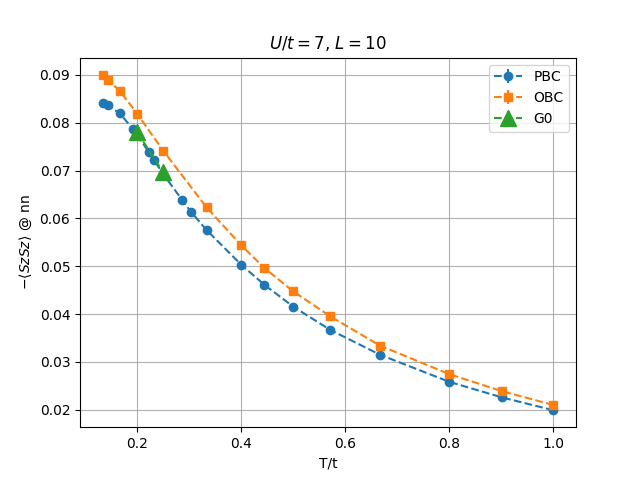

In [10]:
fig, ax = plt.subplots()
ax.errorbar(1./pbc["beta"], -pbc["SzSz"], yerr=-pbc["err"], fmt='o--', label='PBC')
ax.errorbar(1./obc["beta"], -obc["SzSz"], yerr=-obc["err"], fmt='s--', label='OBC')
ax.errorbar(1./ek_g0["beta"], -ek_g0["SzSz"], yerr=-ek_g0["err"], ms=11, fmt="^--", label='G0')

ax.set_ylabel(r"$-\langle Sz Sz \rangle$ @ nn")
ax.set_xlabel(r"T/t")

ax.set_title(r"$U/t=7$, $L=10$")
ax.legend(loc='best')
ax.grid(True)

# Read in and plot `<SzSz>(site1, site2)`

Open BCs, data is indexed by sites, not distances (`g___` file has $N_{site} \times N_{site}$=10000 rows )

In [32]:
dt_sz = [("site1", int), ("site2", int), ("corr", float)]
szsz_U7b5 = np.loadtxt("g____szsz_U7L10b5obc.dat", dtype=dt_sz)

szsz_U7b5.shape

(10000,)

<IPython.core.display.Javascript object>


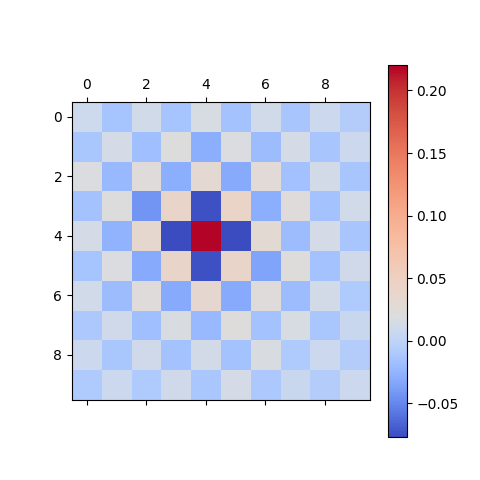

In [154]:
# site=45 is in the middle

corr_45 =szsz_U7b5[szsz_U7b5["site1"]==45]
cax = plt.matshow(corr_45["corr"].reshape((10, 10)), cmap="shiftedcmap")
plt.colorbar(cax)

<IPython.core.display.Javascript object>


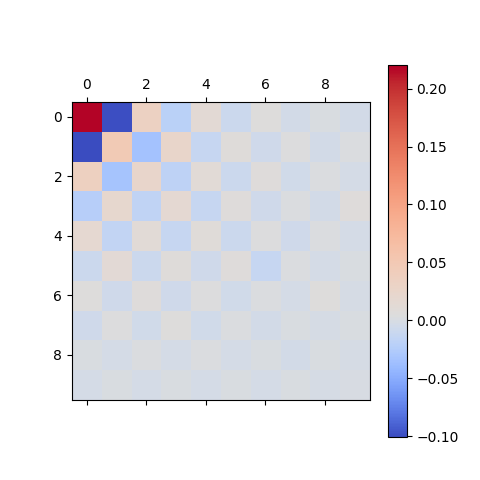

In [153]:
# site=1 is in the corner

corr_1 =szsz_U7b5[szsz_U7b5["site1"]==1]
cax = plt.matshow(corr_1["corr"].reshape((10, 10)), cmap="shiftedcmap")
plt.colorbar(cax)

<IPython.core.display.Javascript object>


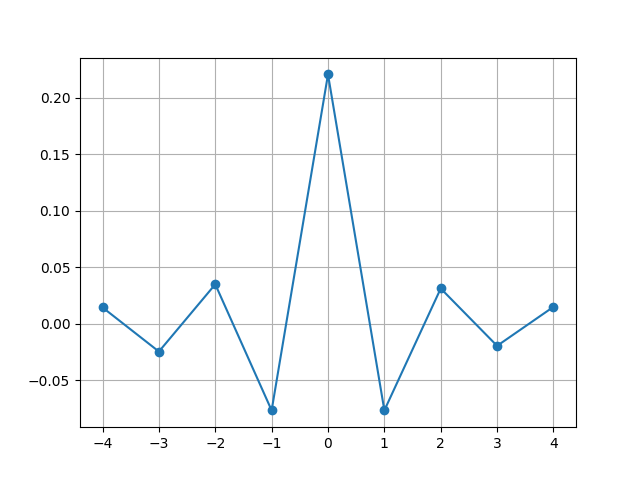

In [40]:
L, site1 = 10, 45

corr_1D =szsz_U7b5[szsz_U7b5["site1"] == site1]
corr_1D = corr_1D[ ((site1 - L//2) < corr_1D["site2"]) & (corr_1D["site2"] < (site1 + L//2))]

plt.plot(corr_1D["site2"] - corr_1D["site1"], corr_1D["corr"], "o-")

plt.grid(True)

# Cook up a colormap

hat tip Paul Hobson,  https://stackoverflow.com/questions/7404116/defining-the-midpoint-of-a-colormap-in-matplotlib



In [116]:
def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero

    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower ofset). Should be between
          0.0 and `midpoint`.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax/(vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highets point in the colormap's range.
          Defaults to 1.0 (no upper ofset). Should be between
          `midpoint` and 1.0.
    '''
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }

    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])

    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))

    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=newcmap)

    return newcmap

In [152]:
vmin = szsz_U7b5['corr'].min()
vmax = szsz_U7b5['corr'].max()

import matplotlib
shifted_cmap = shiftedColorMap(cmap=plt.get_cmap('coolwarm'), midpoint = 1.- vmax/(vmax + np.abs(vmin)))

In [125]:
0.25/0.1

2.5

# Try computing $C_\mathbf{d}$

In [44]:
dx, dy = np.divmod(szsz_U7b5["site1"] - szsz_U7b5["site2"], L)

In [77]:
dx1, dy1 = np.divmod(szsz_U7b5["site1"]-1, L)
dx2, dy2 = np.divmod(szsz_U7b5["site2"]-1, L)

distances = np.sqrt((dx1 - dx2)**2 + (dy1 - dy2)**2)

In [170]:
unique_distances = np.unique(distances)
cd = np.empty(unique_distances.shape[0])
num_distances = np.empty(unique_distances.shape[0])

In [171]:
for j, d in enumerate(unique_distances):
    mask = distances == unique_distances[j]
    num_distances[j] = mask.sum()
    cd[j] = szsz_U7b5["corr"][mask].sum() / mask.sum()

<IPython.core.display.Javascript object>


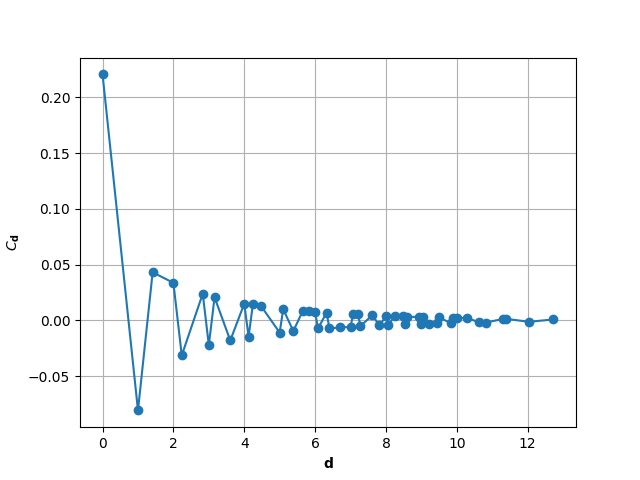

In [172]:
fig, ax = plt.subplots()

ax.plot(unique_distances, cd, 'o-')
ax.grid()
ax.set_xlabel(r"$\mathbf{d}$")
ax.set_ylabel(r"$C_\mathbf{d}$")

<IPython.core.display.Javascript object>


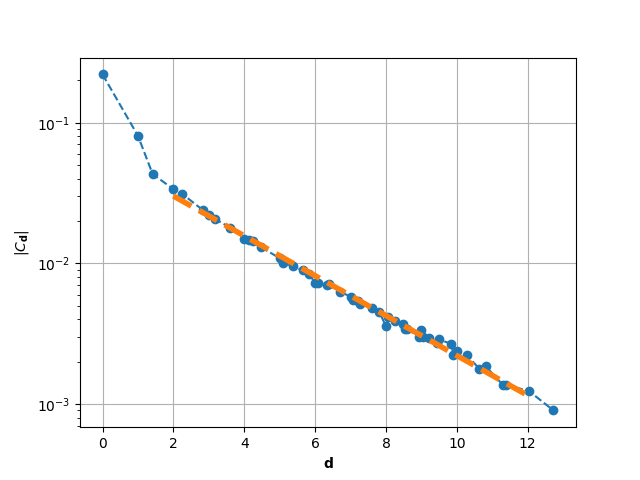

In [173]:
fig, ax = plt.subplots()

ax.semilogy(unique_distances, np.abs(cd), 'o--')
ax.grid(True)
ax.set_xlabel(r"$\mathbf{d}$")
ax.set_ylabel(r"$|C_\mathbf{d}|$")

xx = np.asarray([2.0, 12.0])
ax.semilogy(xx, np.exp(regr.intercept + regr.slope*xx), '--', lw=4)

In [132]:
from scipy.stats import linregress

regr = linregress(unique_distances[2:], np.log(np.abs(cd[2:])))

In [135]:
regr

LinregressResult(slope=-0.32641136828136708, intercept=-2.8491027518605621, rvalue=-0.9973995320639113, pvalue=2.3949823115721151e-55, stderr=0.0034403720474314504)

In [146]:
-1./regr.slope

3.0636187865184845

In [137]:
from scipy.optimize import curve_fit

curve_fit(lambda x, a, b: a + b*x, unique_distances[2:], np.log(np.abs(cd[2:])))

(array([-2.84910275, -0.32641137]),
 array([[  7.02681408e-04,  -8.49351270e-05],
        [ -8.49351270e-05,   1.18361597e-05]]))

# Read in PBC correlators, compare to OBC

In [157]:
dt_sz_pbc = [("x", int), ("y", int), ("corr", float)]
szsz_U7b5pbc = np.loadtxt("g____szsz_U7L10b5pbc.dat", dtype=dt_sz_pbc)

szsz_U7b5pbc.shape

(100,)

<IPython.core.display.Javascript object>


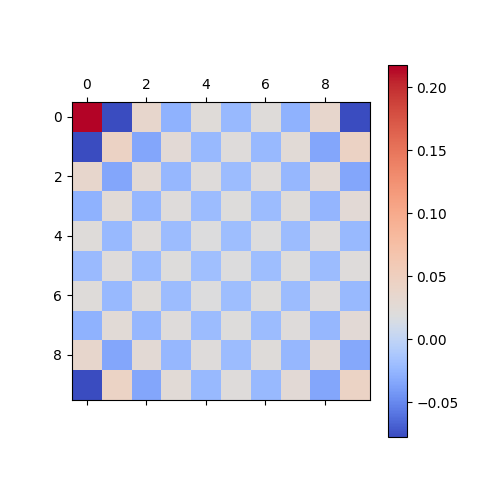

In [158]:
cax = plt.matshow(szsz_U7b5pbc["corr"].reshape((10, 10)), cmap="shiftedcmap")
plt.colorbar(cax)

<IPython.core.display.Javascript object>


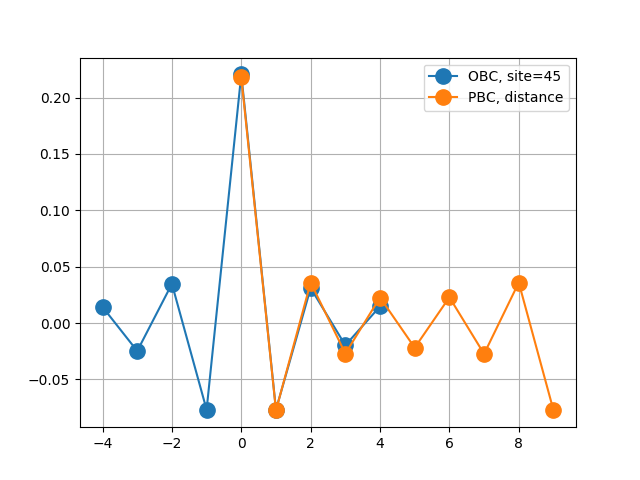

In [164]:
L, site1 = 10, 45

corr_1D =szsz_U7b5[szsz_U7b5["site1"] == site1]
corr_1D = corr_1D[ ((site1 - L//2) < corr_1D["site2"]) & (corr_1D["site2"] < (site1 + L//2))]

plt.plot(corr_1D["site2"] - corr_1D["site1"], corr_1D["corr"], "o-", ms=11, label='OBC, site=45')

#PBC
pbc_cut = szsz_U7b5pbc[szsz_U7b5pbc["y"]==0]
plt.plot(pbc_cut["x"], pbc_cut["corr"], 'o-', ms=11, label='PBC, distance')

plt.legend(loc='best')
plt.grid(True)

# Try computing $C_\mathbf{d}$

In [ ]:
distances = np.sqrt((dx1 - dx2)**2 + (dy1 - dy2)**2)

In [166]:
d = szsz_U7b5pbc["x"]


In [167]:
dx

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9])

In [179]:
distances = np.sqrt(szsz_U7b5pbc["x"]**2 + szsz_U7b5pbc["y"]**2)

unique_distances = np.unique(distances)
num_distances = np.empty(unique_distances.shape[0])

cd_pbc = np.empty(unique_distances.shape[0])

In [180]:
for j, d in enumerate(unique_distances):
    mask = distances == unique_distances[j]
    num_distances[j] = mask.sum()
    cd_pbc[j] = szsz_U7b5pbc["corr"][mask].sum() / mask.sum()

<IPython.core.display.Javascript object>


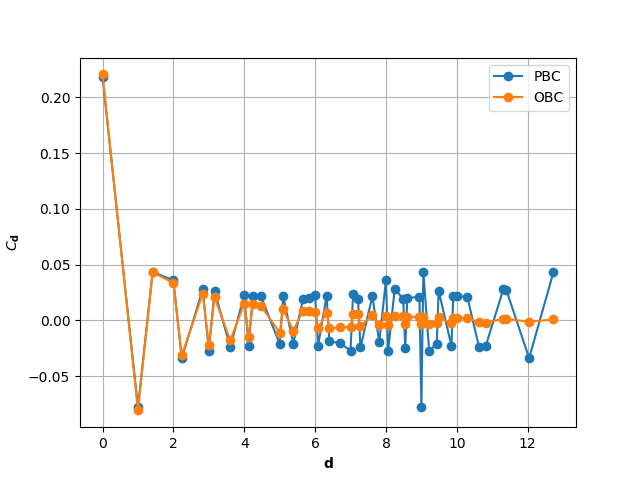

In [182]:
fig, ax = plt.subplots()

ax.plot(unique_distances, cd_pbc, 'o-', label='PBC')
ax.plot(unique_distances, cd, 'o-', label='OBC')
ax.grid()
ax.legend()
ax.set_xlabel(r"$\mathbf{d}$")
ax.set_ylabel(r"$C_\mathbf{d}$")

<IPython.core.display.Javascript object>


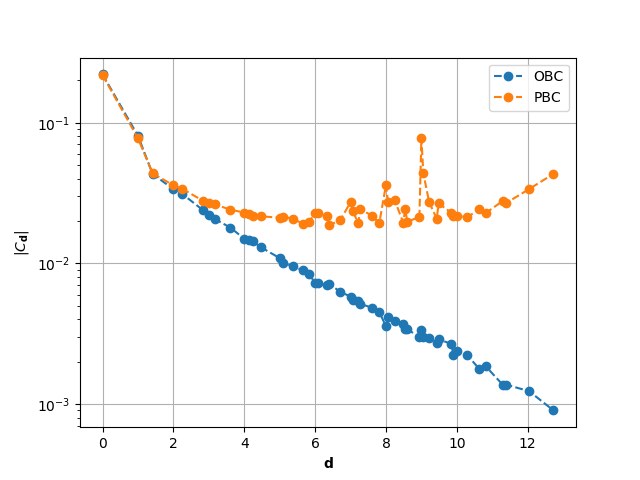

In [184]:
fig, ax = plt.subplots()

ax.semilogy(unique_distances, np.abs(cd), 'o--', label='OBC')
ax.semilogy(unique_distances, np.abs(cd_pbc), 'o--', label='PBC')

ax.grid(True)
ax.set_xlabel(r"$\mathbf{d}$")
ax.set_ylabel(r"$|C_\mathbf{d}|$")
ax.legend()

#xx = np.asarray([2.0, 12.0])
#ax.semilogy(xx, np.exp(regr.intercept + regr.slope*xx), '--', lw=4)